## Data Visualisation Techniques  

#### Exploratory Data Analysis (EDA)

Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data import

In [4]:
df = pd.read_csv('vgsales.csv')

In [ ]:
df.head()

In [5]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [6]:
percentage_missing = (missing_values / len(df)) * 100
print("\nPercentage of missing values:\n", percentage_missing)


Percentage of missing values:
 Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64


In [7]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [8]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (16719, 16)


Analyzing Distributions and Relationships

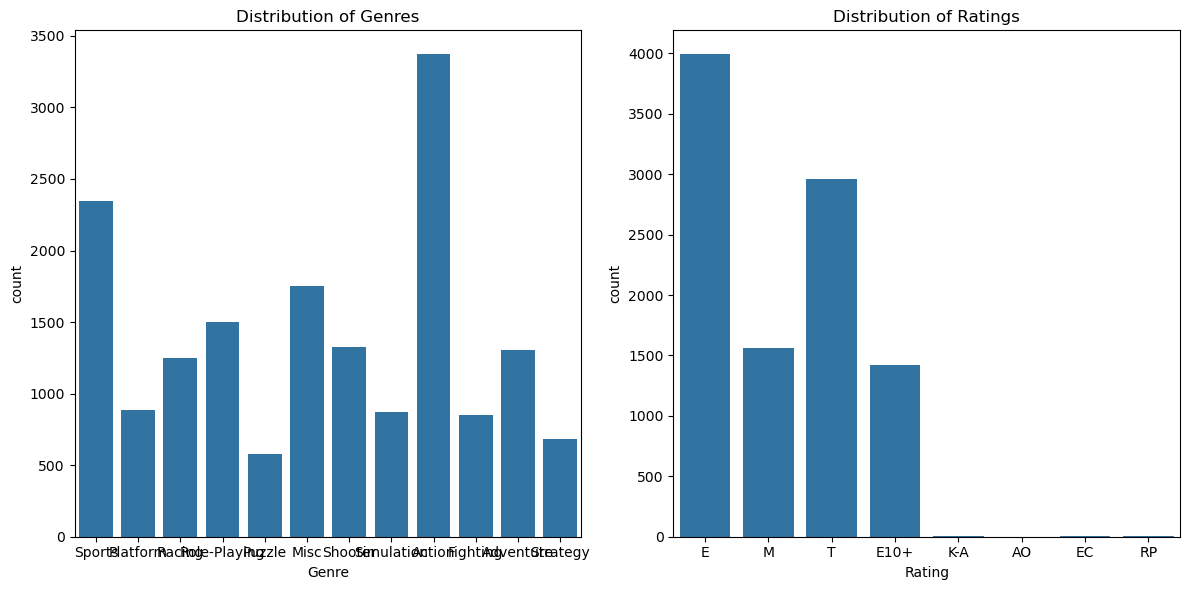

In [10]:
# Distribution of categorical variables
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Genre', data=df)
plt.title('Distribution of Genres')

plt.subplot(1, 2, 2)
sns.countplot(x='Rating', data=df)
plt.title('Distribution of Ratings')

plt.tight_layout()
plt.show()

#### Part 1

• What are the top 5 games by global sales?

In [11]:
top_5_games = df.sort_values(by='Global_Sales', ascending=False).head(5)

# Display the top 5 games by global sales
print("Top 5 games by global sales:")
print(top_5_games[['Name', 'Global_Sales']])

Top 5 games by global sales:
                       Name  Global_Sales
0                Wii Sports         82.53
1         Super Mario Bros.         40.24
2            Mario Kart Wii         35.52
3         Wii Sports Resort         32.77
4  Pokemon Red/Pokemon Blue         31.37


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_25772\2951928128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=top_5_games, palette='viridis')


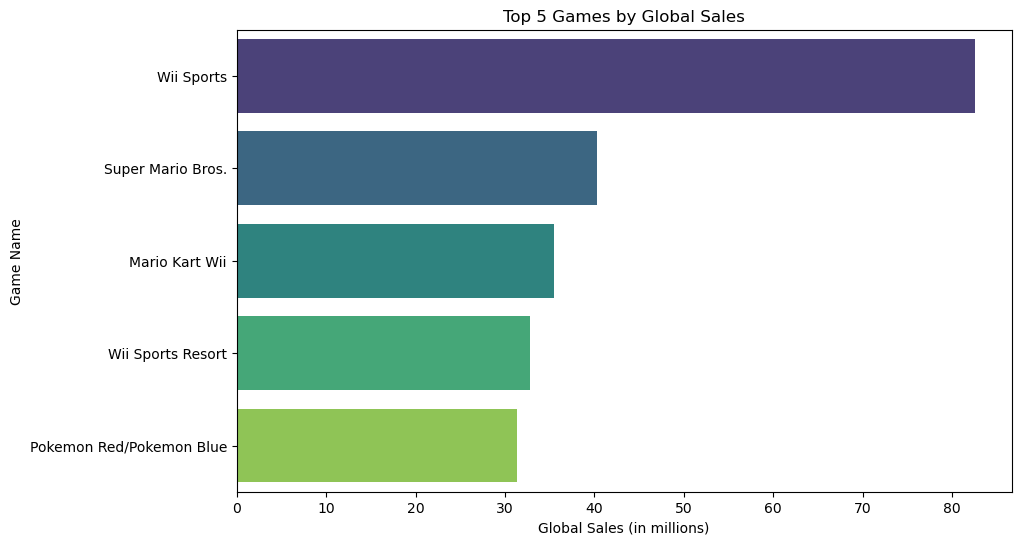

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_5_games, palette='viridis')
plt.title('Top 5 Games by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Name')
plt.show()

• Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?

In [13]:
# Filter the dataset for the years 2010-2014
filtered_df = df[(df['Year_of_Release'] >= 2010) & (df['Year_of_Release'] <= 2014)]

# Calculate the correlation coefficient between NA_Sales and JP_Sales
correlation = filtered_df['NA_Sales'].corr(filtered_df['JP_Sales'])

print("Correlation between NA_Sales and JP_Sales for the years 2010-2014:", correlation)

Correlation between NA_Sales and JP_Sales for the years 2010-2014: 0.26043134778810034


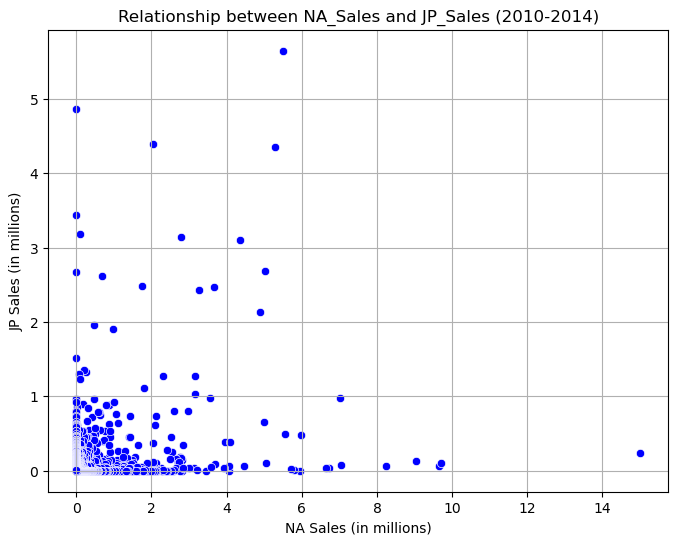

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=filtered_df, color='blue')
plt.title('Relationship between NA_Sales and JP_Sales (2010-2014)')
plt.xlabel('NA Sales (in millions)')
plt.ylabel('JP Sales (in millions)')
plt.grid(True)
plt.show()

• What is the distribution of the most popular 4 game genres?

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_25772\793602078.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre', data=top_4_genre_df, order=top_4_genres, palette='pastel')


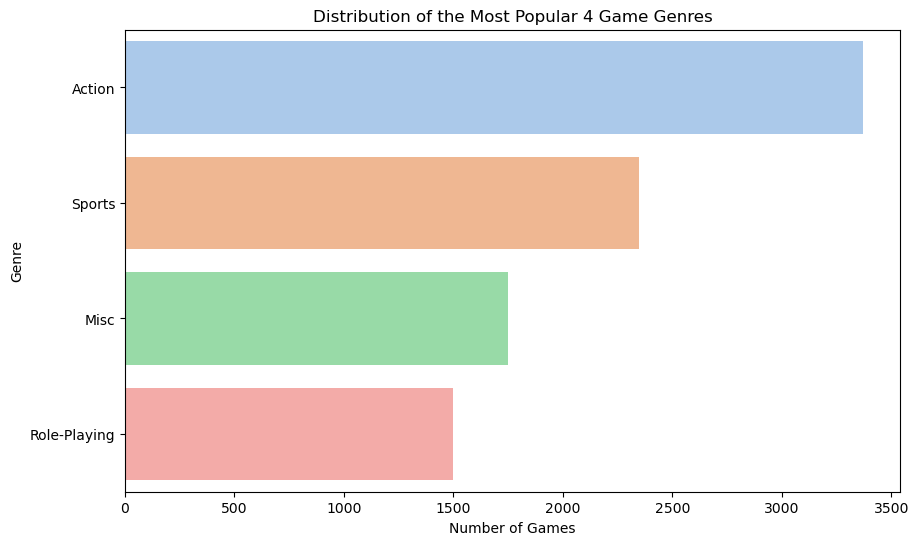

In [15]:
# Find the top 4 most popular game genres
top_4_genres = df['Genre'].value_counts().nlargest(4).index

# Filter the dataset to include only the top 4 genres
top_4_genre_df = df[df['Genre'].isin(top_4_genres)]

# Plotting the distribution of the most popular 4 game genres
plt.figure(figsize=(10, 6))
sns.countplot(y='Genre', data=top_4_genre_df, order=top_4_genres, palette='pastel')
plt.title('Distribution of the Most Popular 4 Game Genres')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.show()

•	Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  

In [16]:
# Splitting the dataset into two groups based on release year
older_games = df[df['Year_of_Release'] <= 2005]
newer_games = df[df['Year_of_Release'] > 2005]

# Calculate the mean EU_Sales for older and newer games
mean_eu_sales_old = older_games['EU_Sales'].mean()
mean_eu_sales_new = newer_games['EU_Sales'].mean()

# Print the mean EU_Sales for older and newer games
print("Mean EU_Sales for older games (2005 and earlier):", mean_eu_sales_old)
print("Mean EU_Sales for newer games (after 2005):", mean_eu_sales_new)

Mean EU_Sales for older games (2005 and earlier): 0.1479159168984132
Mean EU_Sales for newer games (after 2005): 0.14472284028248042


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_25772\839323811.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Older Games', 'Newer Games'], y=[mean_eu_sales_old, mean_eu_sales_new], palette='Set2')


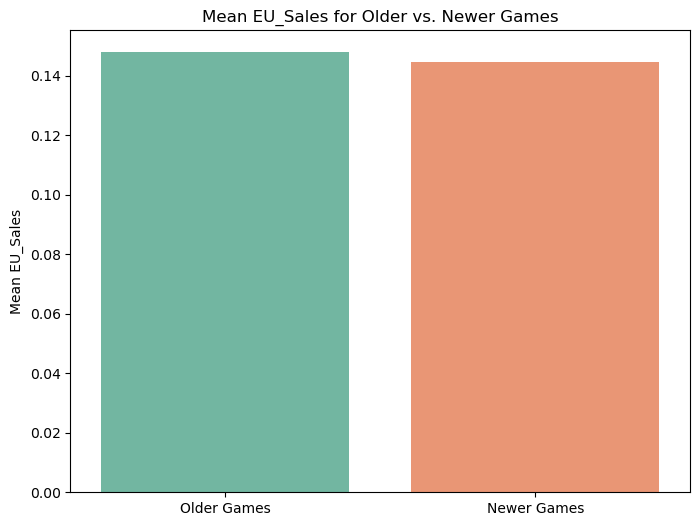

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Older Games', 'Newer Games'], y=[mean_eu_sales_old, mean_eu_sales_new], palette='Set2')
plt.title('Mean EU_Sales for Older vs. Newer Games')
plt.ylabel('Mean EU_Sales')
plt.show()

•	What are the 3 most common “developer” in the dataset?  

In [18]:
# Find the 3 most common developers in the dataset
top_3_developers = df['Developer'].value_counts().nlargest(3)

# Print the 3 most common developers
print("The 3 most common developers in the dataset are:")
print(top_3_developers)

The 3 most common developers in the dataset are:
Developer
Ubisoft      204
EA Sports    172
EA Canada    167
Name: count, dtype: int64


C:\Users\Gustavo\AppData\Local\Temp\ipykernel_25772\741264233.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_developers.index, y=top_3_developers.values, palette='Set3')


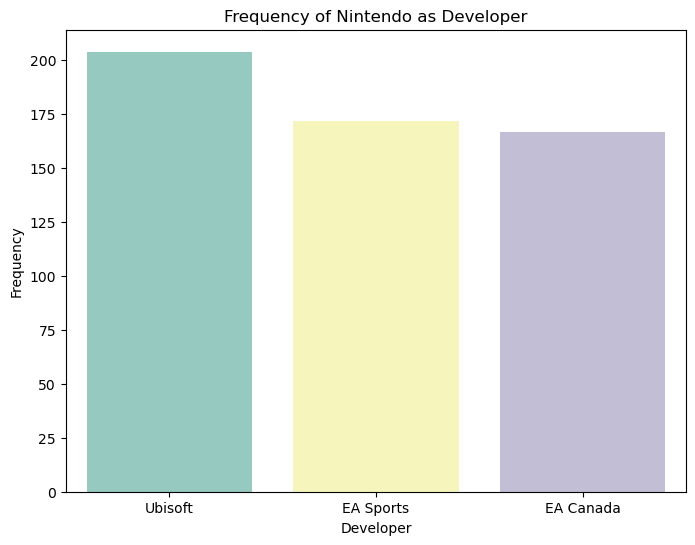

In [19]:
# Create a bar plot to visualize the frequency of Nintendo as the developer
plt.figure(figsize=(8, 6))
sns.barplot(x=top_3_developers.index, y=top_3_developers.values, palette='Set3')
plt.title('Frequency of Nintendo as Developer')
plt.xlabel('Developer')
plt.ylabel('Frequency')
plt.show()

#### Part 2

Statistically Relevant question: Do certain genres tend to have higher global sales than others?

Do certain genres tend to have higher global sales than others?

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_25772\788976362.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='muted')


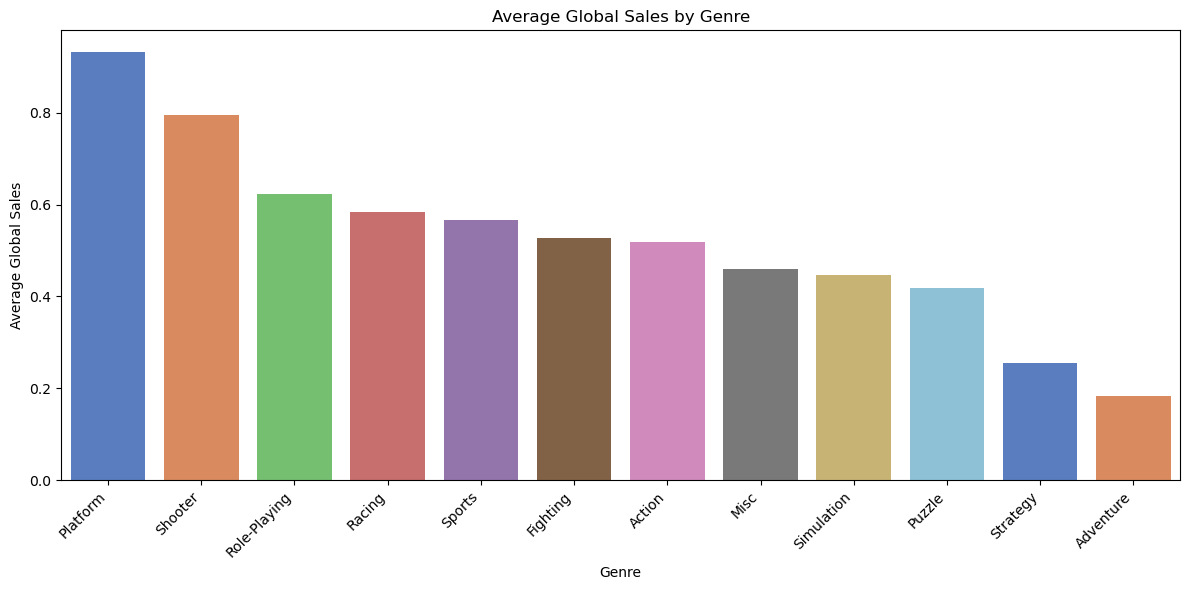

In [20]:
# Group the dataset by genre and calculate the average global sales for each genre
genre_sales = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)

# Plotting the average global sales for each genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='muted')
plt.title('Average Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Global Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Part 3

Why you chose the specific methods to engineer the data and how you achieved this in python:

Handling Missing Values: For the missing values in numerical columns for example critic scores and user scores, I decided to chose to impute them with a flag (-1) that indicate missingness, as imputing with mean or median could mess the analysis and create a biased dataset. For the categorical variable 'Rating', I imputed missing values with a new category 'Unknown' as I cannot decide or predict what category it should be. I achieved this in Python using pandas library functions such as fillna() and adding the new category.

Analyzing Distributions and Relationships: I used summary statistics, scatter plot  and count plots to analyze the distributions and relationships in our data. These methods provide insights and visualization into the central tendency, dispersion, and relationships between variables. I utilized pandas for calculating summary statistics and seaborn and matplotlib libraries for creating visualizations and compare the results.

Why specific visualizations were chosen:

1. Bar Plot: For visualizing the top 5 games by global sales and the frequency of Nintendo as a developer, I decided to use a bar plot as it effectively shows the values for the variables between different categories. I used seaborn and matplotlib for creating bar plots and color that we can distiguish and clearly see.


2. Scatter Plot: To visualize the relationship between Relationship between NA_Sales and JP_Sales (2010-2014), I chose a scatter plot as it shows the distribution of individual data points and helps identify any patterns or correlations between the two variables and I could identify that in the very beginning of the plot the point share same place however it gets very disperse when increased by millions.


3. Count Plot: For analyzing the distribution of genres and ratings, a count plot was selected as it will displays the frequency of each category within a categorical variable as we have a low amount of different variables so plotting as bars can give us the quickest understanding possible. It's useful for identifying the most common categories.

Color: I used pastel ans muted color palettes for bar plots to make them visually appealing and distinguishable.

Font: I used the default font for text readability.

Titles: Each visualization has a descriptive title that clearly conveys the purpose of the plot.

Size: I adjusted the size of the plots to ensure they are legible and visually pleasing.